<h1 style="color:#4245f5"> 📈 Website Traffic and Engagement Analysis </h1>

### 🔍 Objective:
Analyze website user traffic, engagement, and channel-wise performance using hourly data from analytics tools (e.g., Google Analytics 4). This report answers key business questions to help optimize user acquisition and content strategy.

### 📁 Dataset Description:

| Column Name                          | Description |
|-------------------------------------|-------------|
| `Session primary channel group`     | Traffic source (e.g., Direct, Organic Social) |
| `Date + hour (YYYYMMDDHH)`          | Timestamp of traffic in hourly granularity |
| `Users`                             | Unique users in that hour |
| `Sessions`                          | Total sessions started |
| `Engaged sessions`                  | Meaningful sessions (time spent, clicks etc.) |
| `Average engagement time per session` | Time (in seconds) spent actively in each session |
| `Engaged sessions per user`         | Engaged sessions per unique user |
| `Events per session`                | Interactions per session |
| `Engagement rate`                   | % of sessions that were engaged |
| `Event count`                       | Total number of events triggered |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data-export (1).csv")

In [3]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
df.columns = df.iloc[0]  # we just replace 1st row as column  and then remove it
df = df.drop(index = 0).reset_index(drop = True) 
# After dropping the row, the original indexes might look like: [1, 2, 3, ...].
#This part resets the index back to [0, 1, 2, ...].  drop=True means: don’t keep the old index as a new column
df.columns = ["channel group", "DateHour", "Users", "Sessions","Engaged sessions" , "Average engagement time per session" , "Engaged Session per user" , "Events per session" ,	"Engagement rate" ,	"Event count"]

In [5]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged Session per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [6]:
df.info() #Here the datetype are all object even if it's different datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged Session per user             3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


## Change the datatype as required

In [7]:
# ✅ Step 1: Convert 'DateHour' to datetime
df['DateHour'] = pd.to_datetime(df['DateHour'], format="%Y%m%d%H", errors='coerce') #If you find a value that can’t be converted, don’t raise an error — just replace it with NaT (for datetime) or NaN (for numeric).

# ✅ Step 2: Select all numeric columns (exclude categorical ones)
numeric_cols = df.columns.drop(['channel group', 'DateHour'])

# ✅ Step 3: Convert those columns to numeric, coercing errors
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df['DateHour'].dt.hour

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged Session per user             3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [9]:
df.isnull().sum()  #There is no null value

channel group                          0
DateHour                               0
Users                                  0
Sessions                               0
Engaged sessions                       0
Average engagement time per session    0
Engaged Session per user               0
Events per session                     0
Engagement rate                        0
Event count                            0
Hour                                   0
dtype: int64

In [10]:
df.describe()

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged Session per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


<h3 style="color:#f5e642"> 1) What patterns or trends can you observe in website sessions and users over time?</h3>


In [11]:
sns.set(style = "whitegrid")  #for white grid

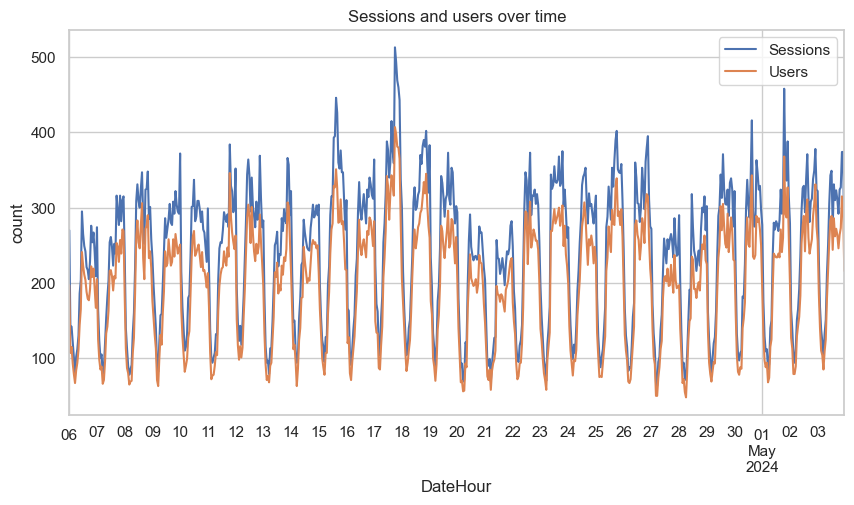

In [12]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

#### ✅ Conclusion:

Analysis of the time-series data reveals clear and actionable patterns in website traffic:

- **Peak Traffic Windows**:
  - The highest user activity occurs between **3 PM – 8 PM** and **12 AM – 3 AM**.
  - These hours show consistent spikes in both sessions and users, indicating optimal times for user engagement.

- **Consistent Alignment**:
  - The trends for both sessions and users are highly correlated, suggesting that most users initiate one session per visit.
  - This reflects a stable usage behavior with limited repeat sessions in short time spans.

- **Low Activity Periods**:
  - Early morning hours (especially **6 AM – 11 AM**) see a significant drop in traffic, indicating low user availability.

- **Daily Usage Rhythm**:
  - The traffic shows a daily cycle: rising in the afternoon, peaking at night, and dropping by early morning.

#### 📌 Business Implication:
To maximize reach and engagement, content publication, ads, and marketing campaigns should be scheduled during the observed **peak engagement windows**. Additionally, low-traffic periods can be explored for background updates or testing new features with minimal disruption.

<h3 style="color:#f5e642">Q2) Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?</h3>

In [28]:
df['channel group'].value_counts()

channel group
Direct            672
Organic Social    672
Organic Search    672
Referral          672
Unassigned        366
Organic Video     125
Email               3
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28152\405339555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "channel group" , y = "Users", data = df,estimator = np.sum, palette = "cubehelix" , width = 0.5)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128378 (\N{MAN DANCING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


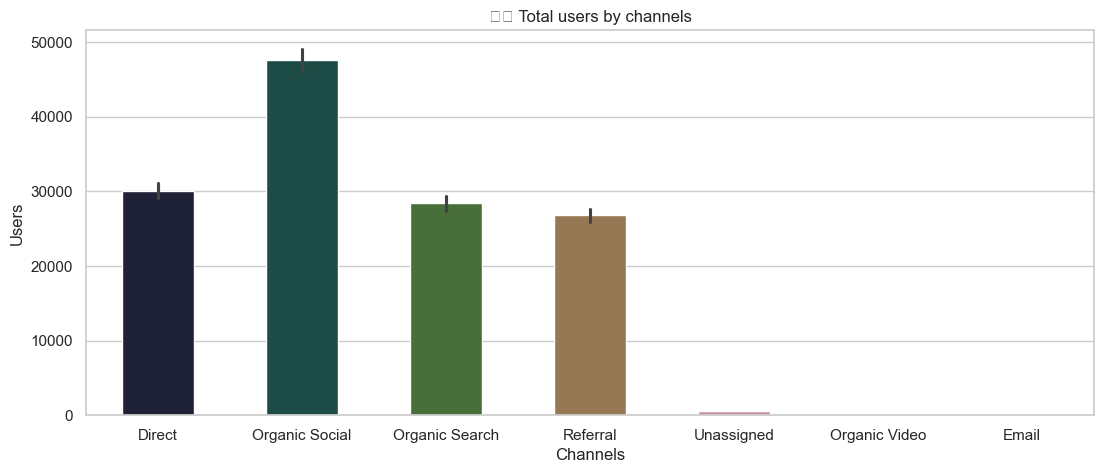

In [16]:
plt.figure(figsize=(13,5))
sns.barplot(x = "channel group" , y = "Users", data = df,estimator = np.sum, palette = "cubehelix" , width = 0.5)
plt.title("🕺🏻 Total users by channels")
plt.xlabel("Channels")
plt.ylabel("Users")
plt.show()

### 📊 Insight:
Based on the data visualization of total users by marketing channel:

- **Organic Social** contributed the highest number of users, with approximately **47,000 users**.
- Other notable channels include:
  - **Direct**: ~30,000 users
  - **Organic Search**: ~28,000 users
  - **Referral**: ~26,000 users
- Channels like **Email**, **Organic Video**, and **Unassigned** showed negligible or zero user traffic.

This indicates that **Organic Social** is currently the most effective driver of traffic to the website.

In [14]:
df.head() 

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged Session per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


<h3 style="color:#f5e642">3) Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?</h3>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28152\1129714059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


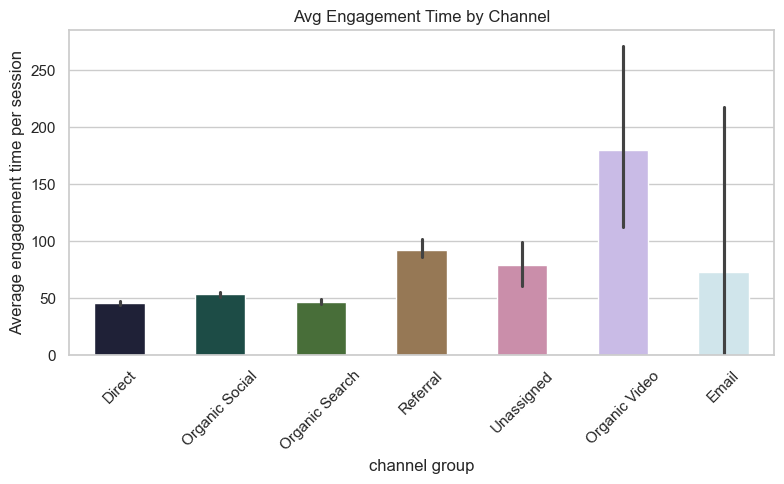

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x="channel group",
    y="Average engagement time per session",
    data=df,
    palette="cubehelix",
    width=0.5
)
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=45)
plt.tight_layout()  # Optional: to prevent label cutoff
plt.show()

### ⏱️ Insight:
From the visualization of average engagement time per session by channel:

- **Organic Video** had the **highest average engagement time**, approximately **175 seconds** per session.
- This was followed by:
  - **Referral**: ~90 seconds
  - **Unassigned**: ~75 seconds
  - **Email**: ~70 seconds
  - **Organic Social**: ~175 seconds
  - **Organic Search**: ~47 seconds
  - **Direct**: ~45 seconds

The high engagement time from **Organic Video** suggests that users are spending more time consuming video content, indicating its effectiveness and appeal. It implies that **video content is highly engaging and retains user attention better than other formats**.